# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
superheroes_info = pd.read_csv("superheroes_info.csv")
superheroes_stats = pd.read_csv("superheroes_stats.csv")
superheroes_power_matrix = pd.read_csv("superheroes_power_matrix.csv")

In [ ]:
superheroes_info.head()

,Unnamed: 0,Name,Identity,Status,Gender,Alignment,Race,Height,Weight,EyeColor,HairColor,SkinColor,Publisher,Year,Appearances,FirstAppearance,AdditionalData
0,0,Spider-Man,Secret,Living,Male,Good,Human,178.0,74.0,Hazel,Brown,NaN,Marvel,1962.0,4043.0,1962-08-01,Peter Parker
1,1,Spider-Man,Secret,Living,Male,Good,Human,178.0,77.0,Hazel,Brown,NaN,Marvel,1962.0,4043.0,1962-08-01,Peter Parker
2,2,Spider-Man,Secret,Living,Male,Good,Human,157.0,56.0,Hazel,Brown,NaN,Marvel,1962.0,4043.0,1962-08-01,Peter Parker
3,3,Captain America,Public,Living,Male,Good,Human,188.0,108.0,Blue,White,NaN,Marvel,1941.0,3360.0,1941-03-01,Steven Rogers
4,4,Captain America,Secret,Living,Male,Bad,Human,188.0,108.0,Blue,Blond,NaN,Marvel,1966.0,1.0,1966-10-01,"Impersonator, Sons of the Serpent"


In [ ]:
superheroes_stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50.0,31.0,43.0,32.0,25.0,52.0,233.0
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0


## Question 1: Good versus Evil - Which group has more combined power?

In [ ]:
combined_power = superheroes_stats.groupby(by="Alignment").sum()
combined_power

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,8209.0,5627.0,4524.0,7593.0,7298.0,7320.0,40539.0
good,18009.0,11374.0,11393.0,16840.0,16541.0,18048.0,91936.0
neutral,670.0,503.0,514.0,831.0,647.0,744.0,3909.0


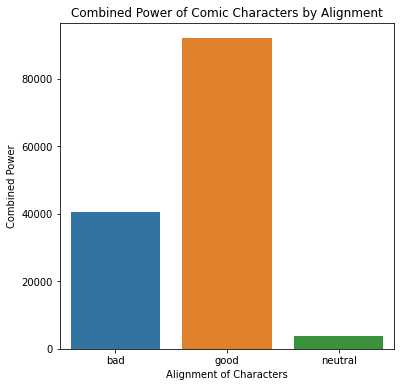

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=combined_power.index, y=combined_power.Total)
plt.title("Combined Power of Comic Characters by Alignment")
plt.xlabel("Alignment of Characters")
plt.ylabel("Combined Power")
plt.show()

### Answer: As Observed Bad Characters have combined power of 40539 where as Good Characters have 91936 of Combined Power.

## Question 2: Which alignment (good\bad) has higher avg speed?

In [ ]:
avg_speed = superheroes_stats.groupby(by="Alignment").mean()
avg_speed

,Intelligence,Strength,Speed,Durability,Power,Combat,Total
Alignment,,,,,,,
bad,67.842975,46.122951,37.388430,62.752066,60.314050,60.495868,335.033058
good,60.230769,38.167785,38.360269,56.700337,55.693603,60.361204,310.594595
neutral,60.909091,45.727273,46.727273,75.545455,58.818182,67.636364,355.363636


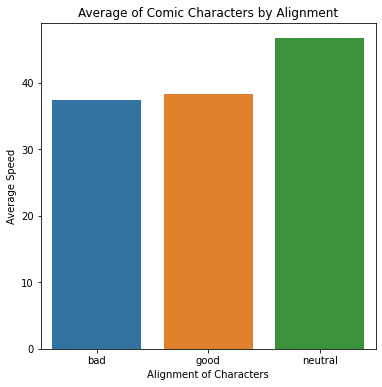

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=avg_speed.index, y=avg_speed.Speed)
plt.title("Average of Comic Characters by Alignment")
plt.xlabel("Alignment of Characters")
plt.ylabel("Average Speed")
plt.show()

### Answer: Neutral Characters have Higher Average Speed than Good Characters followed by Bad Characters.

## Question 3: How many superheros have more Intelligence then Strength?

In [ ]:
count = superheroes_stats[superheroes_stats.Intelligence > superheroes_stats.Strength].Name.count()
print("Count of Characters with Intelligence > Strength : ", count)

Count of Characters with Intelligence > Strength :  303


### Answer: 303 Charactes Have Intelligence higher the their Strength

## Question 4: Show the distribution of Total (all the powers combined) for the good and the evil.

<Figure size 864x432 with 0 Axes>

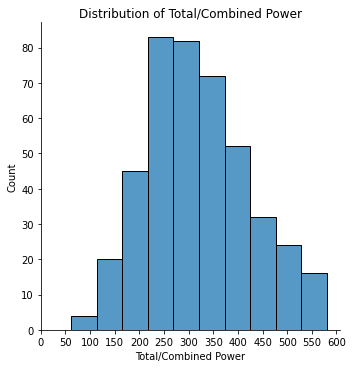

In [ ]:
plt.figure(figsize=(12, 6))
sns.displot(superheroes_stats.Total, bins=10)
plt.xlabel("Total/Combined Power")
plt.title("Distribution of Total/Combined Power")
plt.xticks(np.arange(0, 650, 50))
plt.show()

### Answer: Most of the Super Heros have their Total/Combined Power Ranging between 200 - 400

## Question 5: Who has more characters DC or Marvel?

In [ ]:
heros_count = superheroes_info.Publisher.value_counts()[["Marvel", "DC"]]
heros_count

Marvel    16390
DC         6901
Name: Publisher, dtype: int64

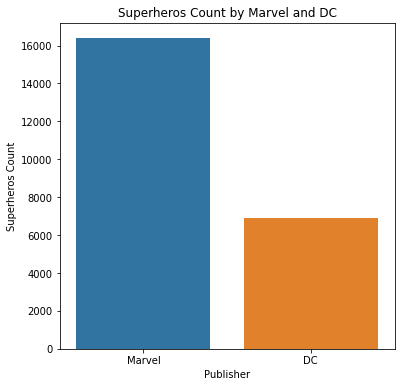

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(x=heros_count.index, y=heros_count)
plt.title("Superheros Count by Marvel and DC")
plt.xlabel("Publisher")
plt.ylabel("Superheros Count")
plt.show()

### Answer: As Seen Marvel has more Superheros than DC

## Question 6: Who has higher representation of female heros DC or Marvel?

In [ ]:
superheros_publisher_gender = superheroes_info[superheroes_info.Publisher.isin(["Marvel", "DC"])]
superheros_publisher_gender = superheros_publisher_gender.groupby("Publisher").Gender.value_counts()
superheros_publisher_gender

Publisher  Gender     
DC         Male            4789
           Female          1969
           Genderless        20
           Transgender        1
Marvel     Male           11671
           Female          3840
           Agender           46
           Genderfluid        2
Name: Gender, dtype: int64

In [ ]:
marvel_female_count = superheros_publisher_gender.Marvel.Female
dc_femal_count = superheros_publisher_gender.DC.Female

print(f"Marvel has {marvel_female_count} Female Superheros")
print(f"DC has {dc_femal_count} Female Superheros", "\n")

if marvel_female_count > dc_femal_count:
    print("Marvel has More Female Superheros")
else:
    print("DC has More Female Superheros")

Marvel has 3840 Female Superheros
DC has 1969 Female Superheros 

Marvel has More Female Superheros


## Question 7: Show the hight distribution for the characters of 'Marvel Comics'.

In [ ]:
superheroes_info_marvel = superheroes_info[superheroes_info.Publisher == "Marvel"]

<Figure size 432x432 with 0 Axes>

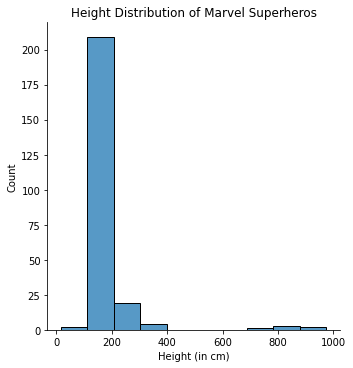

In [ ]:
plt.figure(figsize=(6, 6))
sns.displot(superheroes_info_marvel.Height, bins=10)
plt.xlabel("Height (in cm)")
plt.title("Height Distribution of Marvel Superheros")
plt.show()

## Question 8: How many characters apperred only once?

In [ ]:
result = superheroes_info.groupby("Name").Name.count() == 1
result = result.value_counts()[1]
print(result, "Superheros only appeared Once")

21204 Superheros only appeared Once


## Question 9: How many characters died in their first apperance (have one apperance and are deceased)?

In [ ]:
result = superheroes_info.groupby("Name").Name.count() == 1
result = result[result == True]
data = superheroes_info[superheroes_info.Name.isin(result.index)]
print(data[data.Status == "Deceased"].Name.count(), "Superheros Died in First Appeareance")

4892 Superheros Died in First Appeareance


## Question 10: Display a pie chart of the 10 most common hair styles

In [ ]:
# Top 10 Most Common Hair Styles
common_hair_styles = superheroes_info.HairColor.value_counts()[:10]
common_hair_styles

Black     5448
Brown     3565
Blond     2414
Bald      2017
Red       1121
White     1110
Grey       692
Green      166
Blue       101
Auburn      87
Name: HairColor, dtype: int64

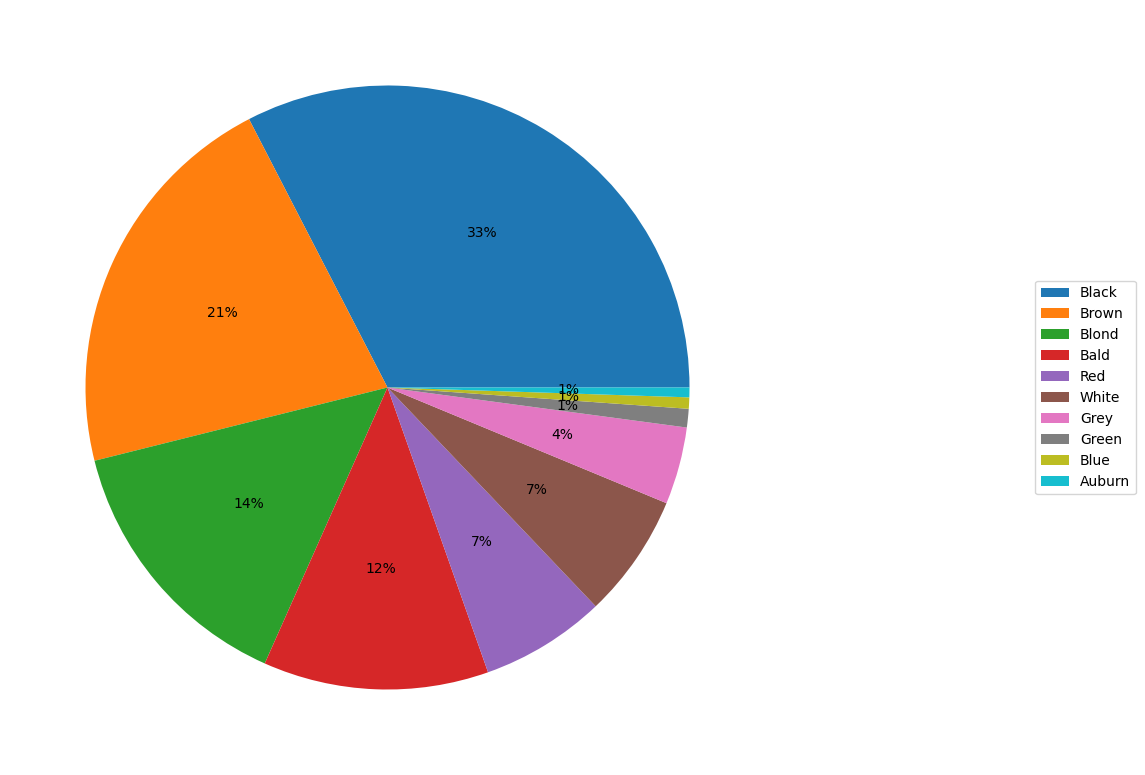

In [ ]:
plt.figure(figsize=((12, 10)),dpi=100)
wedges, texts, autotexts = plt.pie(common_hair_styles, autopct='%1.0f%%')
plt.legend(wedges, common_hair_styles.index, loc='right', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Question 11: 
## We want to build the master group to fight evil, kind of an avengers 2.0, but only better,
## Lets select the captain, the one with the most total stats  (obviously his Alignment must be good to fight evil)

In [ ]:
heros = superheroes_stats[superheroes_stats.Alignment == "good"]
print("Hightest Total Stats : ", heros.Total.max())

Hightest Total Stats :  581.0


In [ ]:
captain = superheroes_stats[superheroes_stats.Total == 581] # Captain with Hightest Total Stats
captain

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100.0,100.0,96.0,100.0,100.0,85.0,581.0


In [ ]:
# Other Members with Total Stats Higher than 500
members = superheroes_stats.loc[(superheroes_stats.Total < 581) & (superheroes_stats.Total >= 500) & (superheroes_stats.Alignment == "good")]
members = members.sort_values(by="Total", ascending=False).reset_index(drop=True)
members

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,Superman,good,100.0,100.0,100.0,100.0,94.0,85.0,579.0
1,Stardust,good,88.0,85.0,100.0,110.0,100.0,85.0,568.0
2,Thor,good,69.0,100.0,92.0,100.0,100.0,85.0,546.0
3,Supergirl,good,94.0,98.0,92.0,100.0,85.0,75.0,544.0
4,Nova,good,100.0,85.0,67.0,101.0,100.0,85.0,538.0
5,Goku,good,56.0,100.0,75.0,90.0,100.0,100.0,521.0
6,Jean Grey,good,100.0,80.0,67.0,100.0,100.0,70.0,517.0
7,Phoenix,good,100.0,80.0,67.0,100.0,100.0,70.0,517.0


## Question 12 : What's the mean intelligence of the superheroes who have a 'True' value in the power matrix and the same for the superheroes who have a 'False' value?

In [ ]:
intelligent_heros = superheroes_power_matrix.Name.loc[superheroes_power_matrix.Intelligence == True].values
non_intelligent_heros = superheroes_power_matrix.Name.loc[superheroes_power_matrix.Intelligence == False].values

In [ ]:
# Mean Intelligence of Intelligent Heros
superheroes_stats[superheroes_stats.Name.isin(intelligent_heros)].Intelligence.mean()

80.87912087912088

In [ ]:
# Mean Intelligence of Non-Intelligent Heros
superheroes_stats[superheroes_stats.Name.isin(non_intelligent_heros)].Intelligence.mean()

57.873456790123456

## Question 13 : Unmatched rivals - show for each super hero the number of vilans that stronger then him/her

In [ ]:
superheroes_stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50.0,31.0,43.0,32.0,25.0,52.0,233.0
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0


In [ ]:
superheroes_stats.Alignment.fillna(value="good", inplace=True)

cols = ["Intelligence","Strength","Speed","Durability","Power","Combat"]
for col in cols:
    superheroes_stats[col].fillna(value=superheroes_stats[col].median(), inplace=True)
    
totals = []

for superhero in superheroes_stats.values:
    totals.append(superhero[2: -1].sum())
    
superheroes_stats.Total = totals

In [ ]:
superheroes_stats.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [ ]:
good_superheros = superheroes_stats[superheroes_stats.Alignment == "good"]
bad_superheros = superheroes_stats[superheroes_stats.Alignment == "bad"]

In [ ]:
unmatched_rivals = []

for goodHero in good_superheros.values:
    count = 0
    for badHero in bad_superheros.values:
        if goodHero[-1] < badHero[-1]:
            count += 1
            
    unmatched_rivals.append(count)

In [ ]:
good_superheros["Unmatched Rivals"] = unmatched_rivals
good_superheros.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Unmatched Rivals
0,3-D Man,good,50.0,31.0,43.0,32.0,25.0,52.0,233.0,140
1,A-Bomb,good,38.0,100.0,17.0,80.0,17.0,64.0,316.0,58
2,Abe Sapien,good,88.0,14.0,35.0,42.0,35.0,85.0,299.0,108
3,Abin Sur,good,50.0,90.0,53.0,64.0,84.0,65.0,406.0,34
6,Adam Monroe,good,63.0,10.0,12.0,100.0,71.0,64.0,320.0,58
7,Adam Strange,good,63.0,32.0,33.0,56.0,58.0,64.0,306.0,62
8,Agent 13,good,63.0,32.0,33.0,56.0,58.0,64.0,306.0,62
9,Agent Bob,good,10.0,8.0,13.0,5.0,5.0,20.0,61.0,165
10,Agent Zero,good,75.0,28.0,38.0,80.0,72.0,95.0,388.0,35
12,Alan Scott,good,63.0,80.0,23.0,90.0,98.0,32.0,386.0,35


## Question 14 : Weak point - for each vilan, show his weakest characteristic.

In [ ]:
bad_superheros.head(10)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0
11,Air-Walker,bad,50.0,85.0,100.0,85.0,100.0,40.0,460.0
16,Amazo,bad,75.0,100.0,100.0,100.0,100.0,100.0,575.0
17,Ammo,bad,63.0,32.0,33.0,56.0,58.0,64.0,306.0
21,Angela,bad,63.0,32.0,33.0,56.0,58.0,64.0,306.0
23,Annihilus,bad,75.0,80.0,47.0,56.0,59.0,64.0,381.0
26,Anti-Monitor,bad,88.0,90.0,38.0,90.0,100.0,90.0,496.0
27,Anti-Spawn,bad,63.0,32.0,33.0,56.0,58.0,64.0,306.0
29,Apocalypse,bad,100.0,100.0,33.0,100.0,100.0,60.0,493.0


In [ ]:
characteristics = {
    0: "Intelligence",
    1: "Strength",
    2: "Speed",
    3: "Durability",
    4: "Power",
    5: "Combat"
}

In [ ]:
weakest_characteristic = []
for hero in bad_superheros.iloc[:, 2:-1].values:
    hero = hero.tolist()
    weakest_characteristic.append(characteristics[hero.index(min(hero))])

In [ ]:
bad_superheros["Weakest Characteristic"] = weakest_characteristic
bad_superheros.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Weakest Characteristic
4,Abomination,bad,63.0,80.0,53.0,90.0,55.0,95.0,436.0,Speed
5,Abraxas,bad,88.0,100.0,83.0,99.0,100.0,56.0,526.0,Combat
11,Air-Walker,bad,50.0,85.0,100.0,85.0,100.0,40.0,460.0,Combat
16,Amazo,bad,75.0,100.0,100.0,100.0,100.0,100.0,575.0,Intelligence
17,Ammo,bad,63.0,32.0,33.0,56.0,58.0,64.0,306.0,Strength


## Question 15 : A great team needs great diversity, and to be great at everything, get the best hero at each statistical category

In [ ]:
characteristics = ["Intelligence","Strength","Speed","Durability","Power","Combat"]

for feature in characteristics:
    print(f"Superheros with {feature}")
    print(good_superheros[good_superheros[feature] == good_superheros[feature].max()], "\n\n")

Superheros with Intelligence
                  Name Alignment  Intelligence  ...  Combat  Total  Unmatched Rivals
24             Ant-Man      good         100.0  ...    32.0  225.0               143
61              Batman      good         100.0  ...   100.0  324.0                56
123         Brainiac 5      good         100.0  ...    32.0  253.0               136
138     Captain Marvel      good         100.0  ...    56.0  480.0                18
198     Doctor Strange      good         100.0  ...    60.0  366.0                46
299           Iron Man      good         100.0  ...    64.0  492.0                16
306          Jean Grey      good         100.0  ...    70.0  517.0                10
361  Martian Manhunter      good         100.0  ...    85.0  581.0                 0
384   Mister Fantastic      good         100.0  ...    64.0  294.0               110
417               Nova      good         100.0  ...    85.0  538.0                 6
433            Phoenix      good    

## Is your strength and intelligence related?
## Question 16 : Show a scatter chart where the x axis is stength, and the y axis is intelligence, scatter heros and villans as two different color dots

In [ ]:
all_data = pd.concat([good_superheros, bad_superheros])

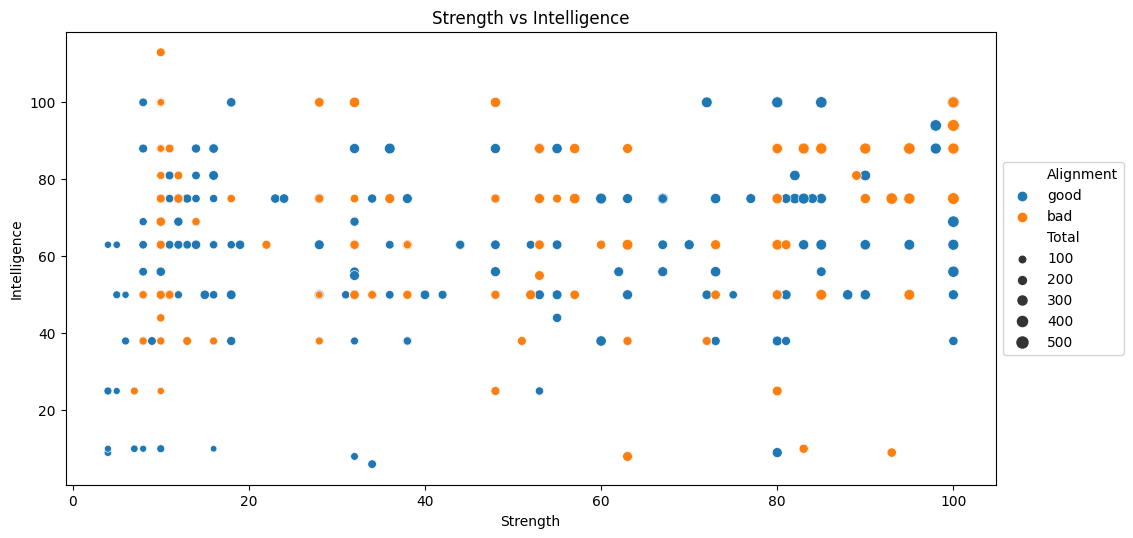

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
sns.scatterplot(x="Strength", y="Intelligence", hue="Alignment",size="Total", data=all_data)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Strength vs Intelligence")
plt.show()

## Question 17 : To truly be a great superhero, you need to possess multipule abilities. Create a series of every superhero and how many different abilities they possess, in descending order

In [ ]:
print(superheroes_power_matrix.columns.tolist())

['Name', 'Agility', 'Accelerated Healing', 'Lantern Power Ring', 'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth', 'Energy Absorption', 'Flight', 'Danger Sense', 'Underwater breathing', 'Marksmanship', 'Weapons Master', 'Power Augmentation', 'Animal Attributes', 'Longevity', 'Intelligence', 'Super Strength', 'Cryokinesis', 'Telepathy', 'Energy Armor', 'Energy Blasts', 'Duplication', 'Size Changing', 'Density Control', 'Stamina', 'Astral Travel', 'Audio Control', 'Dexterity', 'Omnitrix', 'Super Speed', 'Possession', 'Animal Oriented Powers', 'Weapon-based Powers', 'Electrokinesis', 'Darkforce Manipulation', 'Death Touch', 'Teleportation', 'Enhanced Senses', 'Telekinesis', 'Energy Beams', 'Magic', 'Hyperkinesis', 'Jump', 'Clairvoyance', 'Dimensional Travel', 'Power Sense', 'Shapeshifting', 'Peak Human Condition', 'Immortality', 'Camouflage', 'Element Control', 'Phasing', 'Astral Projection', 'Electrical Transport', 'Fire Control', 'Projection', 'Summoning', 'Enhanced M

In [ ]:
superheroes_power_matrix.head()

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
total_powers_count = []

for record in superheroes_power_matrix.values:
    count = 0
    for power in record[1:]:
        if power == True:
            count += 1
            
    total_powers_count.append(count)


In [ ]:
superheroes_power_matrix["Total Powers"] = total_powers_count
superheroes_power_matrix.sort_values(by="Total Powers", ascending=False)[["Name", "Total Powers"]].head(10)

,Name,Total Powers
563,Spectre,49
18,Amazo,44
394,Martian Manhunter,35
370,Living Tribunal,35
388,Man of Miracles,34
139,Captain Marvel,33
597,T-X,33
246,Galactus,32
594,T-1000,32
455,One-Above-All,31


## Question 18 : 

## We saw that the characters with the 'False' intelligence do have a lower intelligence score than the 'True' ones. That means that the 2 different datasets we based our analysis on have a similar evalutaion of characters intelligence in general.

## * Can you find characters that one dataset classifies them as intelligent and the other one classifies them as not intelligent?

## * How many characters like that are there? (since 1 dataset is boolean and the other is numeric, assume that 100 score equals 'True' and 0 score equals 'False')

## * What that might say on those 2 datasets?

In [ ]:
# superheroes_stats
# superheroes_power_matrix

In [ ]:
def common_elements(list1, list2):
    return [element for element in list1 if element in list2]

common_names = common_elements(superheroes_stats.Name.tolist(), superheroes_power_matrix.Name.tolist())
common_names.sort()

In [ ]:
intelligence_data = pd.DataFrame()
intelligence_data["Name"] = common_names
intelligence_data["Intelligence Score"] = superheroes_stats[superheroes_stats.Name.isin(common_names)].sort_values(by="Name").Intelligence
intelligence_data["Intelligent"] = superheroes_power_matrix[superheroes_power_matrix.Name.isin(common_names)].sort_values(by="Name").Intelligence

In [ ]:
intelligence_data.head(10)

,Name,Intelligence Score,Intelligent
0,3-D Man,50.0,False
1,A-Bomb,38.0,False
2,Abe Sapien,88.0,True
3,Abin Sur,50.0,False
4,Abomination,63.0,True
5,Abraxas,88.0,True
6,Adam Monroe,63.0,NaN
7,Adam Strange,63.0,False
8,Agent Bob,NaN,True
9,Agent Zero,10.0,False


In [ ]:
intelligence_data["Intelligence Score"].fillna(intelligence_data["Intelligence Score"].median(), inplace=True)
intelligence_data["Intelligent"].fillna(intelligence_data["Intelligent"].median(), inplace=True)

In [ ]:
# Let us Consider that Superheros with Intelligence Score Higher than 65 are Intelligent
actual_intelligent = []
for record in intelligence_data.values:
  if record[1] > 65:
    actual_intelligent.append(True)
  else:
    actual_intelligent.append(False)

In [ ]:
intelligence_data["Actual Intelligent"] = actual_intelligent

In [ ]:
# Charactes Classified as Intelligent by one Dataset but not by Another Dataset
intelligence_data.loc[intelligence_data["Actual Intelligent"] != intelligence_data["Intelligent"]].Name

4           Abomination
8             Agent Bob
10           Air-Walker
13     Allan Quatermain
16       Ando Masahashi
             ...       
502                Wasp
509         Wonder Girl
510          Wonder Man
511        Wonder Woman
517             Zatanna
Name: Name, Length: 168, dtype: object

In [ ]:
intelligence_data.loc[intelligence_data["Actual Intelligent"] != intelligence_data["Intelligent"]].Name.count()

168

## Question 19 : show the distribution of BMI for all characters with height and weight data. show the distribution according to BMI categories

In [ ]:
superheroes_info.head()

,Unnamed: 0,Name,Identity,Status,Gender,Alignment,Race,Height,Weight,EyeColor,HairColor,SkinColor,Publisher,Year,Appearances,FirstAppearance,AdditionalData
0,0,Spider-Man,Secret,Living,Male,Good,Human,178.0,74.0,Hazel,Brown,NaN,Marvel,1962.0,4043.0,1962-08-01,Peter Parker
1,1,Spider-Man,Secret,Living,Male,Good,Human,178.0,77.0,Hazel,Brown,NaN,Marvel,1962.0,4043.0,1962-08-01,Peter Parker
2,2,Spider-Man,Secret,Living,Male,Good,Human,157.0,56.0,Hazel,Brown,NaN,Marvel,1962.0,4043.0,1962-08-01,Peter Parker
3,3,Captain America,Public,Living,Male,Good,Human,188.0,108.0,Blue,White,NaN,Marvel,1941.0,3360.0,1941-03-01,Steven Rogers
4,4,Captain America,Secret,Living,Male,Bad,Human,188.0,108.0,Blue,Blond,NaN,Marvel,1966.0,1.0,1966-10-01,"Impersonator, Sons of the Serpent"


In [ ]:
# Considering Height is in Centimeter and Weight is in Kilograms
superheroes_info["BMI"] = superheroes_info.Weight/((superheroes_info.Height/100) ** 2)
superheroes_info[["Name", "Height", "Weight", "BMI"]].head(10)

,Name,Height,Weight,BMI
0,Spider-Man,178.0,74.0,23.355637
1,Spider-Man,178.0,77.0,24.302487
2,Spider-Man,157.0,56.0,22.718974
3,Captain America,188.0,108.0,30.556813
4,Captain America,188.0,108.0,30.556813
5,Captain America,188.0,108.0,30.556813
6,Wolverine,160.0,135.0,52.734375
7,Wolverine,160.0,135.0,52.734375
8,Iron Man,198.0,191.0,48.719518
9,Iron Man,198.0,191.0,48.719518


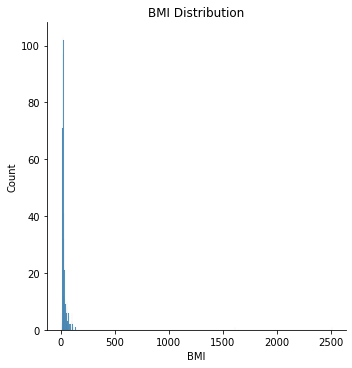

In [ ]:
sns.displot(superheroes_info.BMI)
plt.title("BMI Distribution")
plt.show()

## Question 20 : Show Top Rare and Common abilites

In [ ]:
superheroes_power_matrix.head()

,Name,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Total Powers
0,3-D Man,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,A-Bomb,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7
2,Abe Sapien,1,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16
3,Abin Sur,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Abomination,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [ ]:
superheroes_power_matrix.replace({True: 1, False: 0}, inplace=True)

In [ ]:
abilitites = superheroes_power_matrix.columns[1:-1]
abilitites

Index(['Agility', 'Accelerated Healing', 'Lantern Power Ring',
       'Dimensional Awareness', 'Cold Resistance', 'Durability', 'Stealth',
       'Energy Absorption', 'Flight', 'Danger Sense',
       ...
       'Web Creation', 'Reality Warping', 'Odin Force', 'Symbiote Costume',
       'Speed Force', 'Phoenix Force', 'Molecular Dissipation',
       'Vision - Cryo', 'Omnipresent', 'Omniscient'],
      dtype='object', length=167)

In [ ]:
ability_counts = []

for ability in abilitites:
  count = superheroes_power_matrix[ability].sum()
  ability_counts.append(count)

In [ ]:
ability_count_df = pd.DataFrame()
ability_count_df["Ability"] = abilitites
ability_count_df["Count"] = ability_counts

ability_count_df.sort_values(by="Count", inplace=True)

In [ ]:
ability_count_df.describe()

,Count
count,167.000000
mean,35.173653
std,56.727947
min,1.000000
25%,6.000000
50%,16.000000
75%,35.000000
max,360.000000


In [ ]:
# The Least Common Abilites
ability_count_df.loc[ability_count_df.Count == 1]

,Ability,Count
108,Thirstokinesis,1
137,Intuitive aptitude,1
42,Hyperkinesis,1
109,Hair Manipulation,1
54,Electrical Transport,1
64,Anti-Gravity,1
120,Spatial Awareness,1
115,Biokinesis,1
29,Omnitrix,1
161,Speed Force,1


In [ ]:
# The Most Common Abilites
ability_count_df.tail(10)

,Ability,Count
21,Energy Blasts,147
16,Intelligence,158
59,Reflexes,164
1,Accelerated Healing,178
8,Flight,212
0,Agility,242
30,Super Speed,249
5,Durability,257
25,Stamina,289
17,Super Strength,360
